In [1]:
#Import Stuff here

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, DepthwiseConv2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np


In [2]:
#creates a Image Generator from the directories and scales the images by dividing by 255. Also changes the images sizes to 256x256

def load_data():

    datagen = ImageDataGenerator(rescale = 1/255)
    
    train_it = datagen.flow_from_directory ('data/train/', target_size = (256, 256), 
                                            class_mode = 'categorical', color_mode="rgb", batch_size=64, seed = 1)
    
    val_it = datagen.flow_from_directory ('data/validation/', target_size = (256, 256), 
                                            class_mode = 'categorical', color_mode="rgb", batch_size=64, seed = 1)
    
    test_it = datagen.flow_from_directory ('data/test/', target_size = (256, 256), 
                                            class_mode = 'categorical', color_mode="rgb", batch_size=64, seed = 1,  shuffle=False)
    
    return train_it, val_it, test_it

train_it, val_it, test_it = load_data()

Found 6800 images belonging to 17 classes.
Found 1700 images belonging to 17 classes.
Found 1700 images belonging to 17 classes.


In [3]:
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(64, 256, 256, 3), min=0.000, max=1.000


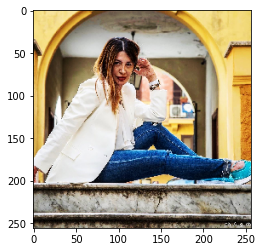

In [4]:
plt.imshow(batchX[0])

In [5]:
batchy[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [6]:
train_it.class_indices

{'1977': 0,
 'Amaro': 1,
 'Brannan': 2,
 'Clarendon': 3,
 'Gingham': 4,
 'He-Fe': 5,
 'Hudson': 6,
 'Lo-Fi': 7,
 'Mayfair': 8,
 'Nashville': 9,
 'Original': 10,
 'Perpetua': 11,
 'Sutro': 12,
 'Toaster': 13,
 'Valencia': 14,
 'Willow': 15,
 'X-ProII': 16}

In [7]:
def build_model():
    # TODO: build the model, 

    
    model = Sequential()

    model.add(DepthwiseConv2D(kernel_size = 3, activation = 'relu', padding='same'))
    

    model.add(Conv2D(64, kernel_size= 3, activation = 'relu', padding='same'))
    model.add(MaxPooling2D (pool_size= 2))
   # model.add(BatchNormalization())
    
  
    model.add(Conv2D(128, kernel_size= 3, activation = 'relu', padding='same'))
    model.add(MaxPooling2D (pool_size= 2))
   # model.add(BatchNormalization())
    

    model.add(Conv2D(256, kernel_size= 3, activation = 'relu',  padding='same'))
    model.add(MaxPooling2D (pool_size= 2))
    

    model.add(Conv2D(512, kernel_size= 3, activation = 'relu',  padding='same'))
    #model.add(GlobalAveragePooling2D()) #produced less accurate results than Flatten
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(17, activation='softmax'))

    return model

model = build_model()

In [ ]:
def compile_model(model):
    # TODO: compile the model


    model.compile(optimizer = 'Adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['AUC', 'accuracy'])


    return model

def train_model(model, train_it, val_it):
    # TODO: train the model

    history = model.fit(train_it, epochs = 24, steps_per_epoch = 107, verbose = 2, validation_data= val_it, validation_steps = 27)
    return model, history


model = compile_model(model)

model, history = train_model(model, train_it, val_it)
print (model.summary())

Epoch 1/24
107/107 - 87s - loss: 2.8282 - auc: 0.6083 - accuracy: 0.0932 - val_loss: 2.4820 - val_auc: 0.7513 - val_accuracy: 0.1688 - 87s/epoch - 812ms/step
Epoch 2/24


In [ ]:
def eval_model(model, test_it):
    # TODO: evaluate the model

    test_loss, test_auc, test_accuracy = model.evaluate (test_it, steps = 27)

    return test_loss, test_auc, test_accuracy

test_loss, test_auc, test_accuracy = eval_model(model, test_it)

In [ ]:
test_it.reset()
preds = model.predict(test_it, steps = 27)

In [ ]:
y_predict = np.argmax(preds,axis=1)

In [ ]:
print(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices))

In [ ]:
y_predict

In [ ]:
error_count = 0

for x in y_predict:
    if y_predict[x] != test_it.labels[x]:
        error_count += 1
        
error_count